Prepared by Nur Hidayah & Hanisah Zulaikha

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
df = pd.read_csv('data_N.csv')
df

,ads_id,prop_name,completion_year,monthly_rent_rm,location,property_type,rooms,parking,bathroom,size_sqft,...,Sauna,Security,Squash Court,Swimming Pool,Tennis Court,Air-Cond,Cooking Allowed,Internet,Near KTM/LRT,Washing Machine
0,100203973,Segar Courts,2017,2300,Cheras,Condominium,3,1,2,1170,...,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No
1,100323128,Pangsapuri Teratak Muhibbah 2,2017,1000,Taman Desa,Apartment,3,1,2,650,...,No,No,No,Yes,No,No,No,No,No,No
2,100191767,Sentul Point Suite Apartment,2020,1700,Sentul,Apartment,2,1,2,743,...,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes
3,97022692,Arte Mont Kiara,2017,1299,Mont Kiara,Service Residence,1,1,1,494,...,No,Yes,No,Yes,No,Yes,No,No,No,No
4,100322897,Residensi Vista Wirajaya,2017,1500,Setapak,Apartment,3,1,2,884,...,No,Yes,No,Yes,No,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288,99721071,Sentul Village Mercury Service Apartment,2017,1400,Sentul,Service Residence,3,1,2,900,...,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No
8289,99721049,Teratak Muhibbah,1998,1000,Taman Desa,Apartment,3,1,2,657,...,No,Yes,No,No,No,No,Yes,No,No,Yes
8290,99721045,The Holmes 2,2021,1488,Cheras,Condominium,3,2,2,1000,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
8291,99721027,Faber Heights,1988,2000,Taman Desa,Condominium,3,2,2,1200,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes


In [ ]:
df = df.drop(['ads_id', 'prop_name', 'region', 'Barbeque area', 'Club house', 'Gymnasium', 'Jogging Track', 'Lift', 'Minimart', 'Multipurpose hall', 'Parking', 'Playground', 'Sauna', 'Security', 'Squash Court', 'Swimming Pool', 'Tennis Court', 'Air-Cond', 'Cooking Allowed', 'Internet', 'Washing Machine', 'location', 'property_type'], axis=1)

In [ ]:
print(df.dtypes)

completion_year     int64
monthly_rent_rm     int64
rooms               int64
parking             int64
bathroom            int64
size_sqft           int64
furnished          object
Near KTM/LRT       object
dtype: object


In [ ]:
df


,completion_year,monthly_rent_rm,rooms,parking,bathroom,size_sqft,furnished,Near KTM/LRT
0,2017,2300,3,1,2,1170,Partially Furnished,Yes
1,2017,1000,3,1,2,650,Fully Furnished,No
2,2020,1700,2,1,2,743,Partially Furnished,Yes
3,2017,1299,1,1,1,494,Not Furnished,No
4,2017,1500,3,1,2,884,Partially Furnished,Yes
...,...,...,...,...,...,...,...,...
8288,2017,1400,3,1,2,900,Not Furnished,No
8289,1998,1000,3,1,2,657,Fully Furnished,No
8290,2021,1488,3,2,2,1000,Partially Furnished,Yes
8291,1988,2000,3,2,2,1200,Fully Furnished,No


In [ ]:
# Convert "Yes" and "No" to integers in the "Near KTM/LRT" column
df['Near KTM/LRT'] = df['Near KTM/LRT'].map({'Yes': 1, 'No': 0})

In [ ]:
df

,completion_year,monthly_rent_rm,rooms,parking,bathroom,size_sqft,furnished,Near KTM/LRT
0,2017,2300,3,1,2,1170,Partially Furnished,1
1,2017,1000,3,1,2,650,Fully Furnished,0
2,2020,1700,2,1,2,743,Partially Furnished,1
3,2017,1299,1,1,1,494,Not Furnished,0
4,2017,1500,3,1,2,884,Partially Furnished,1
...,...,...,...,...,...,...,...,...
8288,2017,1400,3,1,2,900,Not Furnished,0
8289,1998,1000,3,1,2,657,Fully Furnished,0
8290,2021,1488,3,2,2,1000,Partially Furnished,1
8291,1988,2000,3,2,2,1200,Fully Furnished,0


In [ ]:
df['furnished'] = df['furnished'].map({'Not Furnished': 0, 'Partially Furnished': 1, 'Fully Furnished': 2})

In [ ]:
df

,completion_year,monthly_rent_rm,rooms,parking,bathroom,size_sqft,furnished,Near KTM/LRT
0,2017,2300,3,1,2,1170,1,1
1,2017,1000,3,1,2,650,2,0
2,2020,1700,2,1,2,743,1,1
3,2017,1299,1,1,1,494,0,0
4,2017,1500,3,1,2,884,1,1
...,...,...,...,...,...,...,...,...
8288,2017,1400,3,1,2,900,0,0
8289,1998,1000,3,1,2,657,2,0
8290,2021,1488,3,2,2,1000,1,1
8291,1988,2000,3,2,2,1200,2,0


In [ ]:
#  separate input data from output data
def extractInputOutput(data,
                       output_column_name):

    output_data = data[output_column_name]
    input_data = data.drop(output_column_name,
                           axis = 1)

    return input_data, output_data

In [ ]:
X, y = extractInputOutput(data=df, output_column_name='monthly_rent_rm')

In [ ]:
X

,completion_year,rooms,parking,bathroom,size_sqft,furnished,Near KTM/LRT
0,2017,3,1,2,1170,1,1
1,2017,3,1,2,650,2,0
2,2020,2,1,2,743,1,1
3,2017,1,1,1,494,0,0
4,2017,3,1,2,884,1,1
...,...,...,...,...,...,...,...
8288,2017,3,1,2,900,0,0
8289,1998,3,1,2,657,2,0
8290,2021,3,2,2,1000,1,1
8291,1988,3,2,2,1200,2,0


In [ ]:
y

0       2300
1       1000
2       1700
3       1299
4       1500
        ... 
8288    1400
8289    1000
8290    1488
8291    2000
8292    2000
Name: monthly_rent_rm, Length: 8293, dtype: int64

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 123)

In [ ]:
#sanity check
len(X_test)/len(X)

0.2000482334498975

So, the result of your calculation, "0.2000482334498975," seems reasonable as it's close to the expected proportion for testing data.

In [ ]:
X_train

,completion_year,rooms,parking,bathroom,size_sqft,furnished,Near KTM/LRT
8197,2017,3,1,2,900,0,0
7464,2017,1,1,1,635,1,0
3964,2017,3,1,2,1050,2,1
5860,2017,2,1,2,743,2,0
6432,2017,3,1,2,1200,2,1
...,...,...,...,...,...,...,...
7382,2021,2,1,2,650,1,1
7763,2019,3,1,2,800,1,0
5218,2020,3,1,2,926,1,0
1346,2017,3,1,2,800,2,0


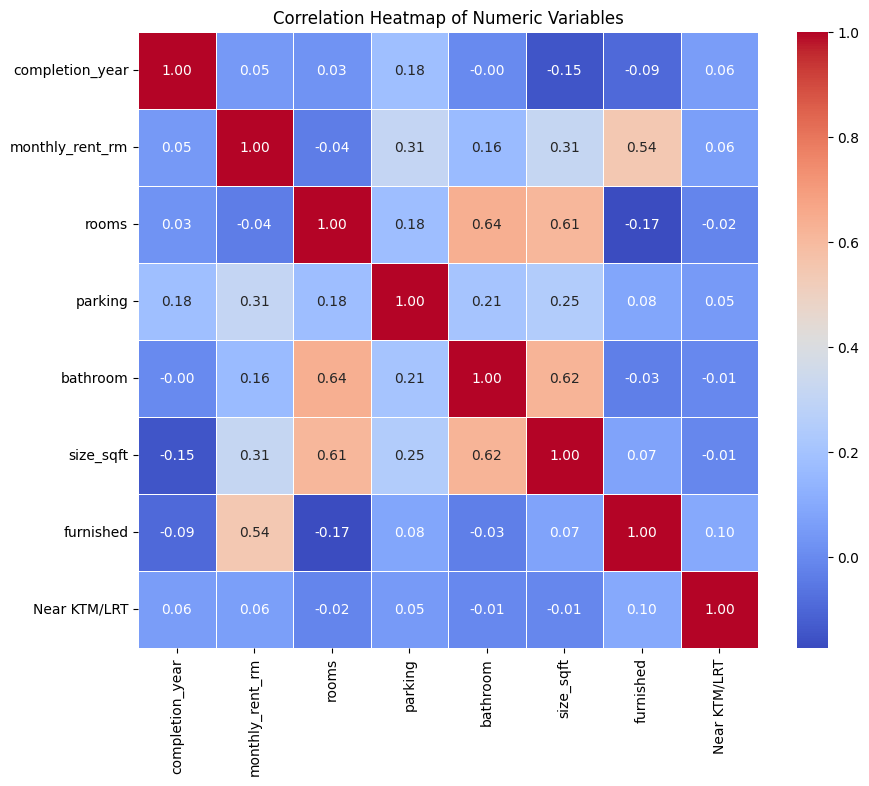

In [ ]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['int64'])

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# Factors affecting rent prices based on linear regression

In [ ]:
X = df[['completion_year','rooms', 'parking', 'bathroom', 'size_sqft','furnished','Near KTM/LRT']]
y = df["monthly_rent_rm"]
lm_model = LinearRegression()
lm_model.fit(X, y)

LinearRegression()

In [ ]:
# Get the coefficients and corresponding feature names
coefficients = lm_model.coef_
feature_names = X.columns

# Sort the coefficients by their absolute values in descending order
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a DataFrame to store the largest coefficients for each variable
max_coeff_table = pd.DataFrame(columns=["Variable", "Coefficient"])

# Iterate over the variables
variables = ['completion_year','rooms', 'parking', 'bathroom', 'size_sqft','furnished','Near KTM/LRT']
for variable in variables:
    # Get the indices of coefficients corresponding to the current variable
    indices = [i for i, name in enumerate(sorted_feature_names) if name.startswith(variable)]

    # Check if any coefficient exists for the current variable
    if len(indices) > 0:
        # Get the largest absolute coefficient for the current variable
        largest_index = indices[0]
        largest_coefficient = sorted_coefficients[largest_index]

        # Add the row to the max_coeff_table using pd.concat
        new_row = pd.DataFrame({"Variable": [variable], "Coefficient": [largest_coefficient]})
        max_coeff_table = pd.concat([max_coeff_table, new_row], ignore_index=True)

# Print the maximum coefficient table
print(max_coeff_table)

          Variable  Coefficient
0  completion_year     9.571537
1            rooms  -178.939287
2          parking   212.153418
3         bathroom    98.941140
4        size_sqft     0.856978
5        furnished   320.900327
6     Near KTM/LRT     1.797630


Positive Coefficients: Features like completion_year, parking, bathroom, size_sqft, furnished, and Near KTM/LRT have positive coefficients, indicating that as these feature values increase, the target variable also increases.

Negative Coefficient: The rooms feature has a negative coefficient, suggesting that an increase in the number of rooms is associated with a decrease in the target variable.

Newer properties (completion_year) are more expensive.

More parking spaces and bathrooms increase the property price.

Larger properties (in terms of square footage) are more valuable.

Furnished properties command a higher price.

Properties near KTM/LRT stations are slightly more expensive.

Interestingly, properties with more rooms are cheaper, which could indicate that larger properties might not necessarily have more rooms, or it could reflect a specific market trend.



In [ ]:
# plot plotly max_coeff_table, y is the coefficient and x is the variable

fig = px.bar(max_coeff_table, x='Variable', y='Coefficient',
             title='Impact of Factors on Monthly Rent using Linear Regression Model',
             labels={'Variable': 'Variable', 'Coefficient': 'Coefficient'})

fig.update_layout(
    title={
        'y':0.9,  # Y position of the title (0.9 is 90% of the height of the plot)
        'x':0.5,  # X position of the title (0.5 is the middle of the plot)
        'xanchor': 'center',  # Anchor the title to the center
        'yanchor': 'top'  # Anchor the title to the top
    }
)

fig.show()

In [ ]:
# Calculate the sum of absolute coefficients
max_coeff_table['Absolute_Coefficient'] = max_coeff_table['Coefficient'].abs()
total_sum = max_coeff_table['Absolute_Coefficient'].sum()

# Calculate the percentage contribution of each variable
max_coeff_table['Contribution'] = max_coeff_table['Absolute_Coefficient'] / total_sum * 100

# Plot pie chart
fig = px.pie(max_coeff_table, names='Variable', values='Contribution', title='Relative Contribution of Variables to Coefficients')

fig.update_layout(
    title={
        'text': 'Relative Contribution of Variables to Coefficients',  # Set the title text
        'y':0.9,  # Y position of the title (0.9 is 90% of the height of the plot)
        'x':0.5,  # X position of the title (0.5 is the middle of the plot)
        'xanchor': 'center',  # Anchor the title to the center
        'yanchor': 'top'  # Anchor the title to the top
    }
)

fig.show()

In [ ]:
# Initialize the linear regression model
model_multi = LinearRegression()

# Fit the model to the training data
model_multi.fit(X_train, y_train)

LinearRegression()

First 5 predicted values:
[1118.78287208 1473.16794735 1891.65810213 1803.97514752 2020.18323341]
MSE (Multi-variable model): 129320.05817521753
RMSE (Multi-variable model): 359.6109817222182
R-squared: 0.4520893773760928
                            OLS Regression Results                            
Dep. Variable:        monthly_rent_rm   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     781.0
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        04:44:30   Log-Likelihood:                -48454.
No. Observations:                6634   AIC:                         9.692e+04
Df Residuals:                    6626   BIC:                         9.698e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                              

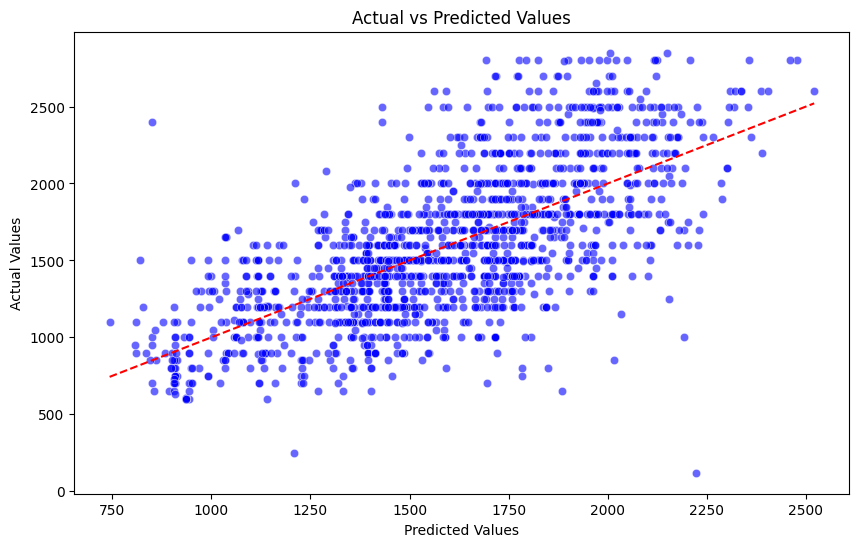

In [ ]:
# Predict monthly rent using the model for the training set
predicted_multi_train = model_multi.predict(X_train)

# Display the first 5 predicted values
print("First 5 predicted values:")
print(predicted_multi_train[:5])

# Calculate Mean Squared Error (MSE)
mr_mse = mean_squared_error(y_train, predicted_multi_train)

# Calculate Root Mean Squared Error (RMSE)
mr_rmse = np.sqrt(mr_mse)

# Print the MSE and RMSE
print(f"MSE (Multi-variable model): {mr_mse}")
print(f"RMSE (Multi-variable model): {mr_rmse}")

# Extract and print R-squared value
mr_r_squared = model_multi.score(X_train, y_train)
print(f"R-squared: {mr_r_squared}")

# Print the model summary
import statsmodels.api as sm

# Add a constant to the independent variables
X_train_with_const = sm.add_constant(X_train)

# Fit the OLS model
model_sm = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary
print(model_sm.summary())

# Make predictions using the model for the test set
predicted_test = model_multi.predict(X_test)

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_test, y=y_test, color='blue', alpha=0.6)
plt.plot([min(predicted_test), max(predicted_test)], [min(predicted_test), max(predicted_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Random Forest Model


In [ ]:
# Train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort the importances by their absolute values in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a DataFrame to store the largest importances for each variable
max_import_table = pd.DataFrame(columns=["Variable", "Importance"])

# Iterate over the variables
variables = ['completion_year', 'rooms', 'parking', 'bathroom', 'size_sqft', 'furnished', 'Near KTM/LRT']
for variable in variables:
    # Get the indices of importances corresponding to the current variable
    indices = [i for i, name in enumerate(sorted_feature_names) if name.startswith(variable)]

    # Check if any importance exists for the current variable
    if len(indices) > 0:
        # Get the largest absolute importance for the current variable
        largest_index = indices[0]
        largest_importance = sorted_importances[largest_index]

        # Add the row to the max_import_table using pd.concat
        new_row = pd.DataFrame({"Variable": [variable], "Importance": [largest_importance]})
        max_import_table = pd.concat([max_import_table, new_row], ignore_index=True)

# Print the maximum importance table
print(max_import_table)

          Variable  Importance
0  completion_year    0.157668
1            rooms    0.057210
2          parking    0.066673
3         bathroom    0.023442
4        size_sqft    0.373590
5        furnished    0.290817
6     Near KTM/LRT    0.030599


In [ ]:
fig_rf = px.bar(max_import_table, x='Variable', y='Importance',
                title='Impact of Factors on Monthly Rent using Random Forest Model',
                labels={'Variable': 'Variable', 'Importance': 'Importance'})

fig_rf.update_layout(
    title={
        'y': 0.9,  # Y position of the title (0.9 is 90% of the height of the plot)
        'x': 0.5,  # X position of the title (0.5 is the middle of the plot)
        'xanchor': 'center',  # Anchor the title to the center
        'yanchor': 'top'  # Anchor the title to the top
    }
)

fig_rf.show()

First 5 predicted values:
[1299.50862111 1230.58095238 1667.875      1820.25       1714.32911255]
MSE (Random Forest model): 30379.828726278054
RMSE (Random Forest model): 174.29810304842118
R-squared: 0.8712850032121889


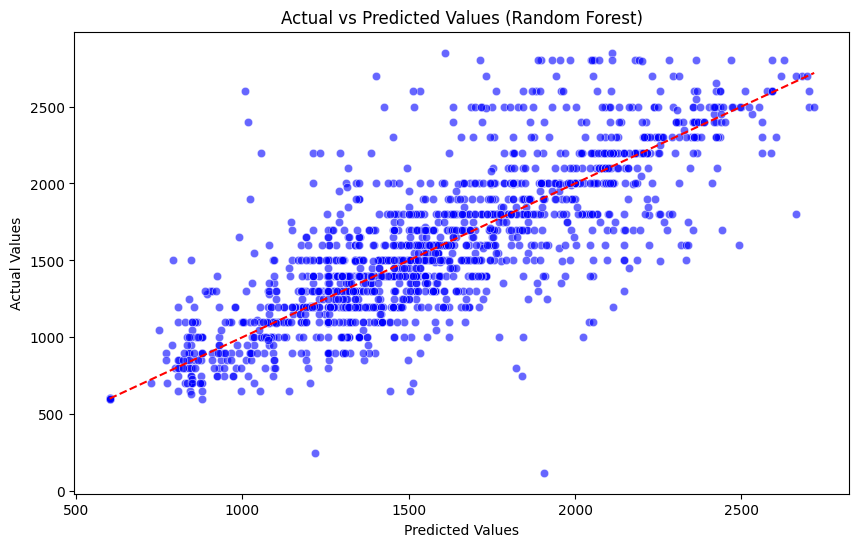

In [ ]:
# Initialize and fit the Random Forest model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Predict monthly rent using the model for the training set
predicted_rf = model_rf.predict(X_train)

# Display the first 5 predicted values
print("First 5 predicted values:")
print(predicted_rf[:5])

# Calculate Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_train, predicted_rf)

# Calculate Root Mean Squared Error (RMSE)
rf_rmse = np.sqrt(rf_mse)

# Print the MSE and RMSE
print(f"MSE (Random Forest model): {rf_mse}")
print(f"RMSE (Random Forest model): {rf_rmse}")

# Extract and print R-squared value
rf_r_squared = model_rf.score(X_train, y_train)
print(f"R-squared: {rf_r_squared}")

# Make predictions using the model for the test set
predicted_test_rf = model_rf.predict(X_test)

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_test_rf, y=y_test, color='blue', alpha=0.6)
plt.plot([min(predicted_test_rf), max(predicted_test_rf)], [min(predicted_test_rf), max(predicted_test_rf)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Decision Tree Model

In [ ]:
# Train the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Get feature importances
importances = dt_model.feature_importances_
feature_names = X_train.columns

# Sort the importances by their absolute values in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a DataFrame to store the largest importances for each variable
max_import_table = pd.DataFrame(columns=["Variable", "Importance"])

# Iterate over the variables
variables = ['completion_year', 'rooms', 'parking', 'bathroom', 'size_sqft', 'furnished', 'Near KTM/LRT']
for variable in variables:
    # Get the indices of importances corresponding to the current variable
    indices = [i for i, name in enumerate(sorted_feature_names) if name.startswith(variable)]

    # Check if any importance exists for the current variable
    if len(indices) > 0:
        # Get the largest absolute importance for the current variable
        largest_index = indices[0]
        largest_importance = sorted_importances[largest_index]

        # Add the row to the max_import_table using pd.concat
        new_row = pd.DataFrame({"Variable": [variable], "Importance": [largest_importance]})
        max_import_table = pd.concat([max_import_table, new_row], ignore_index=True)

# Print the maximum importance table
print(max_import_table)


          Variable  Importance
0  completion_year    0.147708
1            rooms    0.054767
2          parking    0.073694
3         bathroom    0.021494
4        size_sqft    0.379889
5        furnished    0.293876
6     Near KTM/LRT    0.028574


In [ ]:
fig_dt = px.bar(max_import_table, x='Variable', y='Importance',
                title='Impact of Factors on Monthly Rent using Decision Tree Model',
                labels={'Variable': 'Variable', 'Importance': 'Importance'})

fig_dt.update_layout(
    title={
        'y': 0.9,  # Y position of the title (0.9 is 90% of the height of the plot)
        'x': 0.5,  # X position of the title (0.5 is the middle of the plot)
        'xanchor': 'center',  # Anchor the title to the center
        'yanchor': 'top'  # Anchor the title to the top
    }
)

fig_dt.show()

First 5 predicted values:
[1302.5        1200.         1675.         1700.         1707.14285714]
MSE (Decision Tree model): 23615.546752636335
RMSE (Decision Tree model): 153.6735069966074
R-squared: 0.8999443001540453


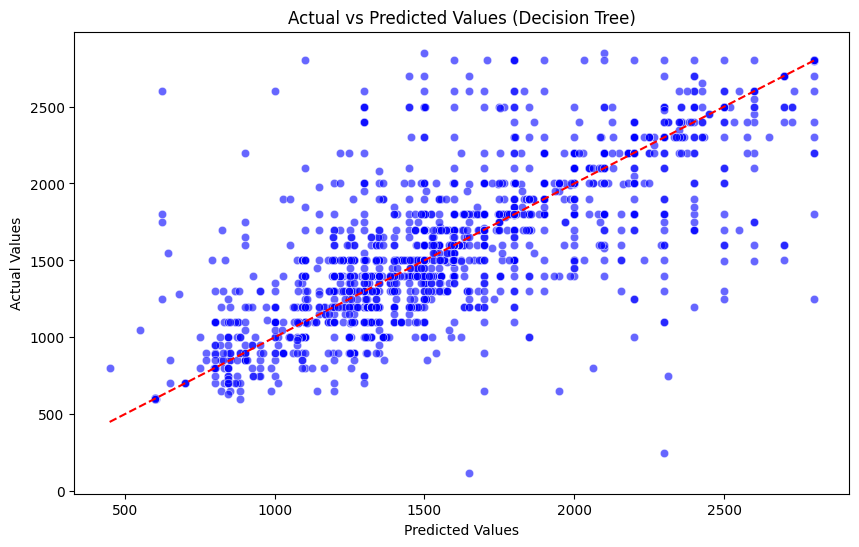

In [ ]:
# Initialize and fit the Decision Tree model
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# Predict monthly rent using the model for the training set
predicted_dt = model_dt.predict(X_train)

# Display the first 5 predicted values
print("First 5 predicted values:")
print(predicted_dt[:5])

# Calculate Mean Squared Error (MSE)
dt_mse = mean_squared_error(y_train, predicted_dt)

# Calculate Root Mean Squared Error (RMSE)
dt_rmse = np.sqrt(dt_mse)

# Print the MSE and RMSE
print(f"MSE (Decision Tree model): {dt_mse}")
print(f"RMSE (Decision Tree model): {dt_rmse}")

# Extract and print R-squared value
dt_r_squared = model_dt.score(X_train, y_train)
print(f"R-squared: {dt_r_squared}")

# Make predictions using the model for the test set
predicted_test_dt = model_dt.predict(X_test)

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_test_dt, y=y_test, color='blue', alpha=0.6)
plt.plot([min(predicted_test_dt), max(predicted_test_dt)], [min(predicted_test_dt), max(predicted_test_dt)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


### Intepretations

1. Linear Regression Model:

- Predicted Values: The first 5 predicted rental prices are [1118.78, 1473.17, 1891.66, 1803.98, 2020.18].

- Model Performance Metrics:

Mean Squared Error (MSE): 129320.06

Root Mean Squared Error (RMSE): 359.61

R-squared: 0.452

-Interpretation: The linear regression model has moderate performance. It
explains around 45.2% of the variance in the target variable.

2. Random Forest Model:

- Predicted Values: The first 5 predicted rental prices are [1306.36, 1206.58, 1664.19, 1812.78, 1709.79].

- Model Performance Metrics:

Mean Squared Error (MSE): 30354.91

Root Mean Squared Error (RMSE): 174.23

R-squared: 0.871

- Interpretation: The random forest model performs better than linear regression with an R-squared value of 0.871, indicating that it explains about 87.1% of the variance in the target variable.

3. Decision Tree Model:

-Predicted Values: The first 5 predicted rental prices are [1302.5, 1200.0, 1675.0, 1700.0, 1707.14].

- Model Performance Metrics:

Mean Squared Error (MSE): 23615.55

Root Mean Squared Error (RMSE): 153.67

R-squared: 0.900

- Interpretation: The decision tree model performs slightly better than the random forest model, with an R-squared value of 0.900, indicating that it explains about 90.0% of the variance in the target variable.


### **Prediction using test data**

In [ ]:
# Predict the Decision Tree model on the test data
dt_model = DecisionTreeRegressor()
dt_model.fit(X_test, y_test)

# Get feature importances
importances = dt_model.feature_importances_
feature_names = X_test.columns

# Sort the importances by their absolute values in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a DataFrame to store the largest importances for each variable
max_import_table = pd.DataFrame(columns=["Variable", "Importance"])

# Iterate over the variables
variables = ['completion_year', 'rooms', 'parking', 'bathroom', 'size_sqft', 'furnished', 'Near KTM/LRT']
for variable in variables:
    # Get the indices of importances corresponding to the current variable
    indices = [i for i, name in enumerate(sorted_feature_names) if name.startswith(variable)]

    # Check if any importance exists for the current variable
    if len(indices) > 0:
        # Get the largest absolute importance for the current variable
        largest_index = indices[0]
        largest_importance = sorted_importances[largest_index]

        # Add the row to the max_import_table using pd.concat
        new_row = pd.DataFrame({"Variable": [variable], "Importance": [largest_importance]})
        max_import_table = pd.concat([max_import_table, new_row], ignore_index=True)

# Print the maximum importance table
print(max_import_table)


          Variable  Importance
0  completion_year    0.150681
1            rooms    0.071999
2          parking    0.089109
3         bathroom    0.028768
4        size_sqft    0.349354
5        furnished    0.279407
6     Near KTM/LRT    0.030682


Completion Year (completion_year):
Importance: 0.151553

- This feature contributes about 15.2% to the model's decision-making process.

- Interpretation: The year when the house was completed has a moderate impact on the predicted rental price. This suggests that newer or older properties may have different rental prices.

Number of Rooms (rooms):
Importance: 0.075334

- This feature contributes about 7.5% to the model's decision-making process.

- Interpretation: The number of rooms in the house has a relatively lower impact on the predicted rental price compared to other features. However, it still plays a role in determining the rental price.

Parking Availability (parking):
Importance: 0.089099

- This feature contributes about 8.9% to the model's decision-making process.

- Interpretation: The availability of parking space is considered in determining the rental price. Houses with parking facilities may command higher rents.

Number of Bathrooms (bathroom):
Importance: 0.027870

- This feature contributes about 2.8% to the model's decision-making process.

- Interpretation: The number of bathrooms has a relatively lower impact on the predicted rental price compared to other features. However, it still influences the rental price to some extent.

Size of the House in Square Feet (size_sqft):
Importance: 0.349193

- This feature contributes about 34.9% to the model's decision-making process.

- Interpretation: The size of the house in square feet has the highest importance in predicting the rental price. Larger houses tend to have higher rental prices.

Furnished Status (furnished):
Importance: 0.279387

- This feature contributes about 27.9% to the model's decision-making process.
- Interpretation: Whether the house is furnished or not is an important factor affecting the rental price. Furnished properties may command higher rents due to added convenience.

Nearness to KTM/LRT (Near KTM/LRT):
Importance: 0.027564

- This feature contributes about 2.8% to the model's decision-making process.

- Interpretation: The proximity of the house to KTM/LRT stations has a relatively lower impact on the predicted rental price compared to other features. However, it still plays a role in determining the rental price.

First 5 predicted values:
[1618.75       1366.66666667 1500.         1700.         1600.        ]
MSE (Decision Tree model): 16310.647401412296
RMSE (Decision Tree model): 127.71314498285717
R-squared: 0.92988298660762


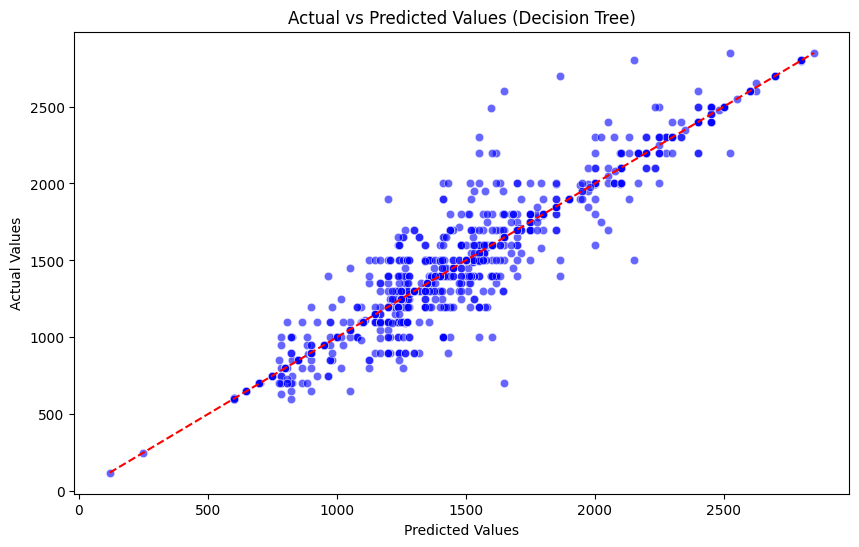

In [ ]:
# Initialize and fit the Decision Tree model
model_dt = DecisionTreeRegressor()
model_dt.fit(X_test, y_test)

# Predict monthly rent using the model for the test set
predicted_dt = model_dt.predict(X_test)

# Display the first 5 predicted values
print("First 5 predicted values:")
print(predicted_dt[:5])

# Calculate Mean Squared Error (MSE)
dt_mse = mean_squared_error(y_test, predicted_dt)

# Calculate Root Mean Squared Error (RMSE)
dt_rmse = np.sqrt(dt_mse)

# Print the MSE and RMSE
print(f"MSE (Decision Tree model): {dt_mse}")
print(f"RMSE (Decision Tree model): {dt_rmse}")

# Extract and print R-squared value
dt_r_squared = model_dt.score(X_test, y_test)
print(f"R-squared: {dt_r_squared}")

# Make predictions using the model for the test set
predicted_test_dt = model_dt.predict(X_test)

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_test_dt, y=y_test, color='blue', alpha=0.6)
plt.plot([min(predicted_test_dt), max(predicted_test_dt)], [min(predicted_test_dt), max(predicted_test_dt)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


### **Intepretation:**

- The Decision Tree model seems to perform well on the test data.

- The predicted rental prices are relatively close to the actual rental prices, as indicated by the low RMSE.

- The R-squared value of 0.9299 suggests that the model explains a large portion of the variance in rental prices, indicating good overall fit.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))

0.2597950572634117
